In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [2]:
# Create dataframe
columns = ['id', 'text', 'emotion']
emotion = pd.read_csv('../data/emotion.data', names=columns, skiprows=1)

In [3]:
emotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
id         416809 non-null int64
text       416809 non-null object
emotion    416809 non-null object
dtypes: int64(1), object(2)
memory usage: 9.5+ MB


In [4]:
emotion.describe()

,id
count,416809.000000
mean,49861.667793
std,38147.703195
min,0.000000
25%,17846.000000
50%,39719.000000
75%,79025.000000
max,141066.000000


In [5]:
emotion.head()

,id,text,emotion
0,27383,i feel awful about it too because it s my job ...,sadness
1,110083,im alone i feel awful,sadness
2,140764,ive probably mentioned this before but i reall...,joy
3,100071,i was feeling a little low few days back,sadness
4,2837,i beleive that i am much more sensitive to oth...,love


In [6]:
# Display unique values for emotion
emotion['emotion'].unique()

array(['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
      dtype=object)

In [7]:
# Create boolean array by emotion
sadness = emotion['emotion'] == 'sadness'
joy = emotion['emotion'] == 'joy'
love = emotion['emotion'] == 'love'
anger = emotion['emotion'] == 'anger'
fear = emotion['emotion'] == 'fear'
surprise = emotion['emotion'] == 'surprise'

In [8]:
text = emotion.drop(['id', 'emotion'], axis=1)

In [9]:
text_sadness = " ".join(review for review in text[sadness].text)
text_joy = " ".join(review for review in text[joy].text)
text_love = " ".join(review for review in text[love].text)
text_anger = " ".join(review for review in text[anger].text)
text_fear = " ".join(review for review in text[fear].text)
text_surprise = " ".join(review for review in text[surprise].text)

text_list = [text_sadness, text_joy, text_love, text_anger, text_fear, text_surprise]
text_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [10]:
def text_visual(text, name):
    wc = WordCloud(max_words=50).generate(text)
    plt.figure(figsize=(15, 10))
    plt.title(name)
    plt.imshow(wc, interpolation='bilinear')
    plt.show()
    return wc.words_

In [11]:
sadness_dict = {}
joy_dict = {}
love_dict = dict()
anger_dict = dict()
fear_dict = {}
surprise_dict = {}

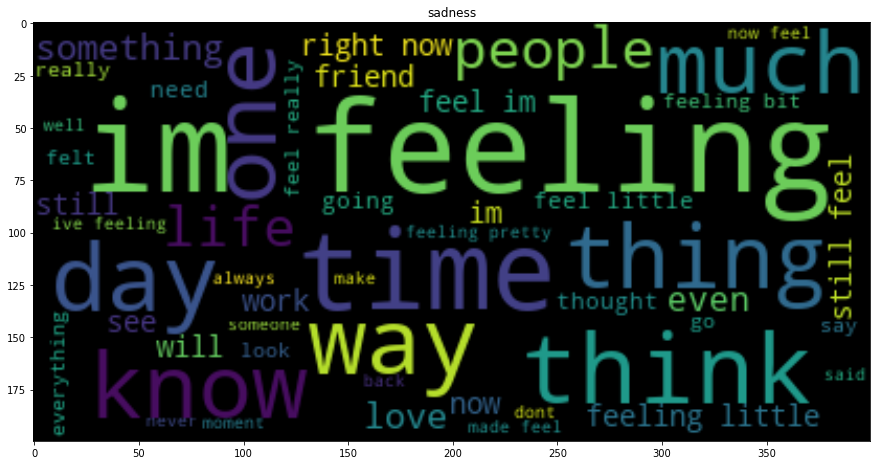

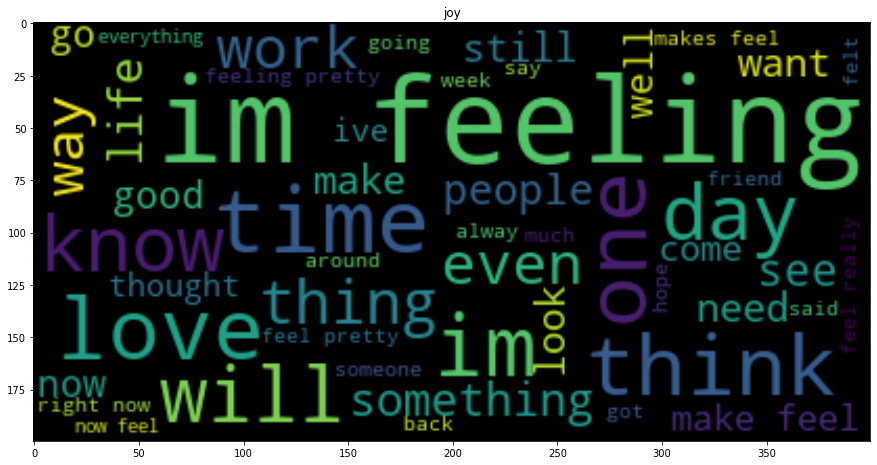

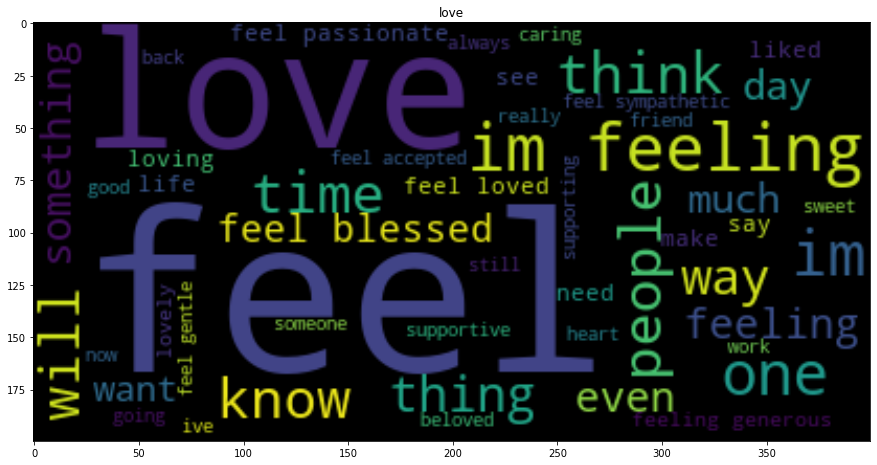

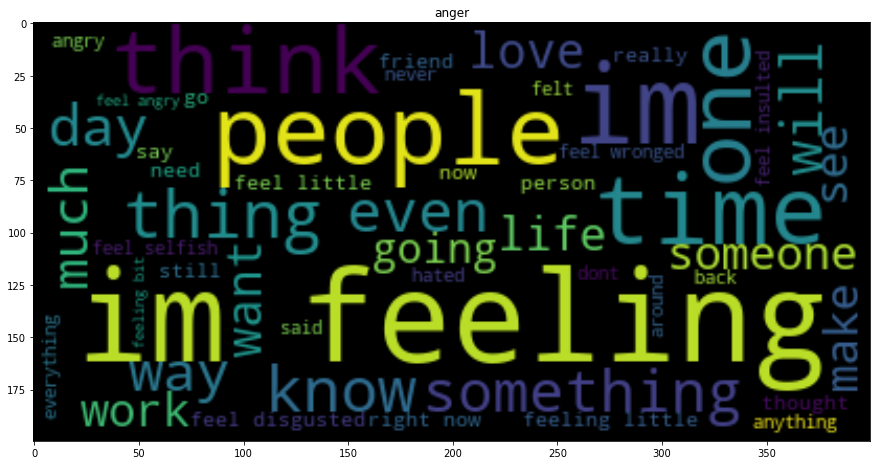

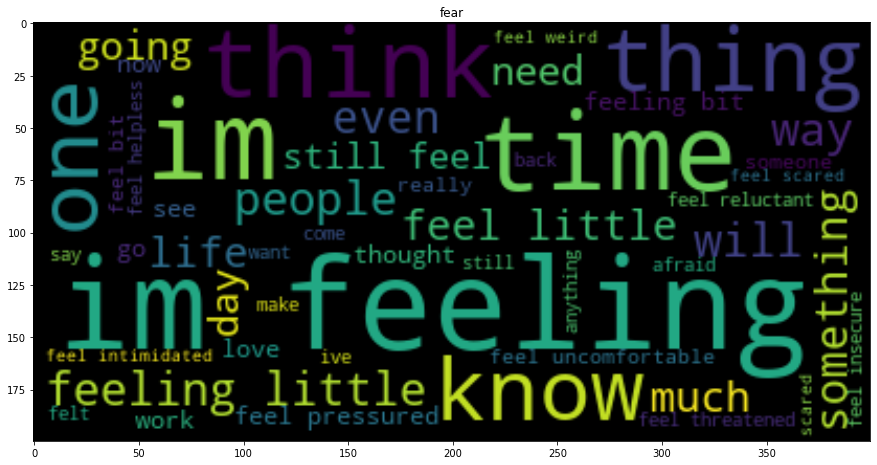

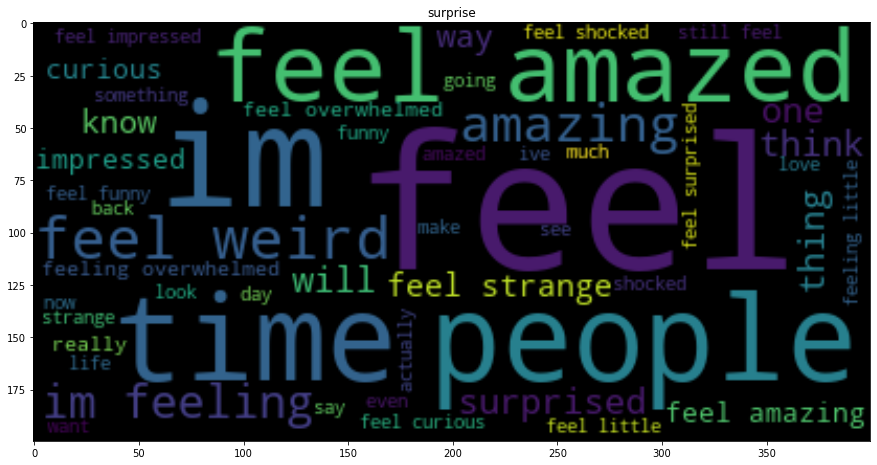

In [12]:
sadness_dict = text_visual(text_sadness, 'sadness')
joy_dict = text_visual(text_joy, 'joy')
love_dict = text_visual(text_love, 'love')
anger_dict = text_visual(text_anger, 'anger')
fear_dict = text_visual(text_fear, 'fear')
surprise_dict = text_visual(text_surprise, 'surprise')

In [112]:
most_used_words = [key for key in sadness_dict.keys()]
most_used_words += [key for key in joy_dict.keys()]
most_used_words += [key for key in love_dict.keys()]
most_used_words += [key for key in anger_dict.keys()]
most_used_words += [key for key in fear_dict.keys()]
most_used_words += [key for key in surprise_dict.keys()]

In [113]:
print(most_used_words)

['im feeling', 'time', 'think', 'day', 'way', 'one', 'know', 'thing', 'much', 'people', 'life', 'something', 'love', 'even', 'feeling little', 'im', 'feel im', 'right now', 'see', 'still', 'will', 'work', 'friend', 'now', 'still feel', 'feel little', 'going', 'thought', 'need', 'feeling bit', 'really', 'feel really', 'felt', 'say', 'look', 'everything', 'go', 'feeling pretty', 'now feel', 'someone', 'dont', 'well', 'back', 'always', 'never', 'make', 'ive feeling', 'moment', 'said', 'made feel', 'im feeling', 'time', 'love', 'im', 'one', 'think', 'day', 'will', 'know', 'thing', 'work', 'even', 'way', 'something', 'life', 'see', 'people', 'want', 'still', 'make', 'need', 'look', 'well', 'now', 'go', 'good', 'make feel', 'come', 'thought', 'ive', 'feeling pretty', 'say', 'friend', 'alway', 'makes feel', 'right now', 'going', 'said', 'around', 'back', 'feel pretty', 'feel really', 'felt', 'got', 'much', 'hope', 'someone', 'week', 'everything', 'now feel', 'feel', 'love', 'im feeling', 'im'

In [117]:
most_used = pd.Series(most_used_words)

In [123]:
most_used.value_counts()

much                   6
way                    6
know                   6
back                   6
life                   6
im                     6
one                    6
time                   6
will                   6
love                   6
now                    6
think                  6
something              6
even                   6
going                  6
say                    6
im feeling             6
thing                  6
see                    6
make                   6
day                    6
people                 6
want                   5
someone                5
work                   5
really                 5
still                  5
need                   5
felt                   4
feeling little         4
ive                    4
thought                4
go                     4
feel little            4
friend                 4
said                   3
look                   3
right now              3
still feel             3
everything             3


In [149]:
def remove_stop_words(message):
    message_split = message.split()
    new_message = [word for word in message_split if word not in words_to_remove]
    result = ' '.join(new_message)
    return result